# HEART FAILURE PREDICTION


In [1]:
# Data clearnning and EDA
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns

## I. Exploratory Data Analysis

In [2]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 1. Overview on data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [6]:
data[numerical_features].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


##### Age

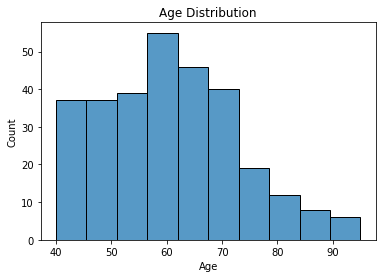

In [7]:
sns.histplot(x=data.age)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

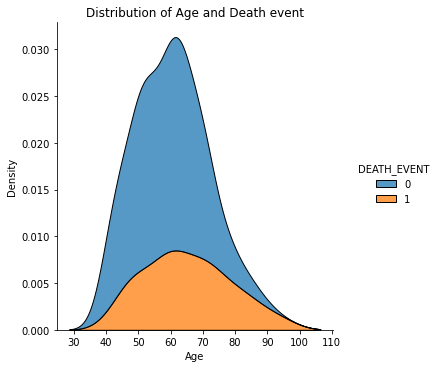

In [8]:
sns.displot(data=data, x="age", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of Age and Death event')
plt.xlabel('Age')
plt.show() 

##### Ejection fraction

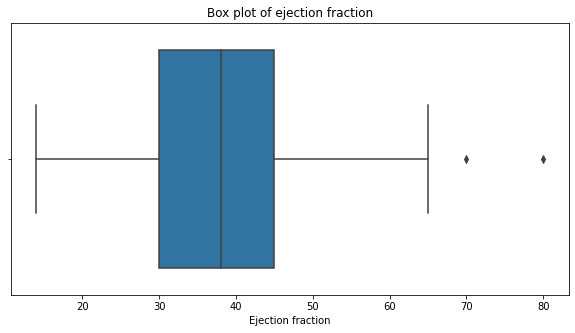

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=data.ejection_fraction, ax=ax)
plt.title('Box plot of ejection fraction')
plt.xlabel('Ejection fraction')
plt.show()

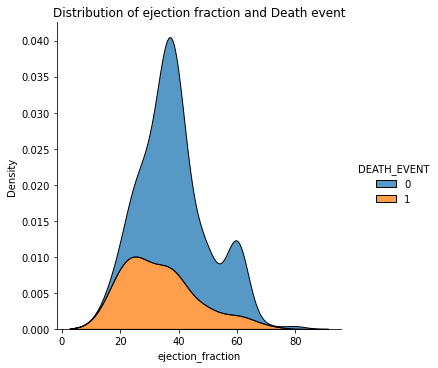

In [10]:
sns.displot(data=data, x="ejection_fraction", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of ejection fraction and Death event')
plt.xlabel('ejection_fraction')
plt.show()

##### Creatinine phosphokinase

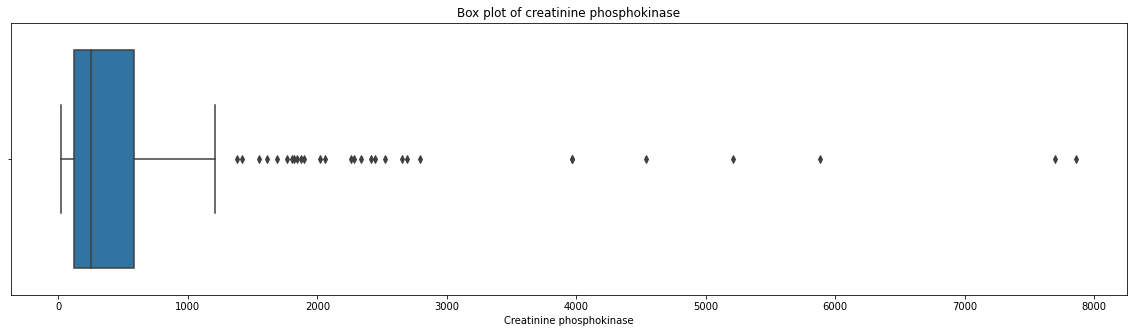

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.creatinine_phosphokinase, ax=ax)
plt.title('Box plot of creatinine phosphokinase')
plt.xlabel('Creatinine phosphokinase')
plt.show()

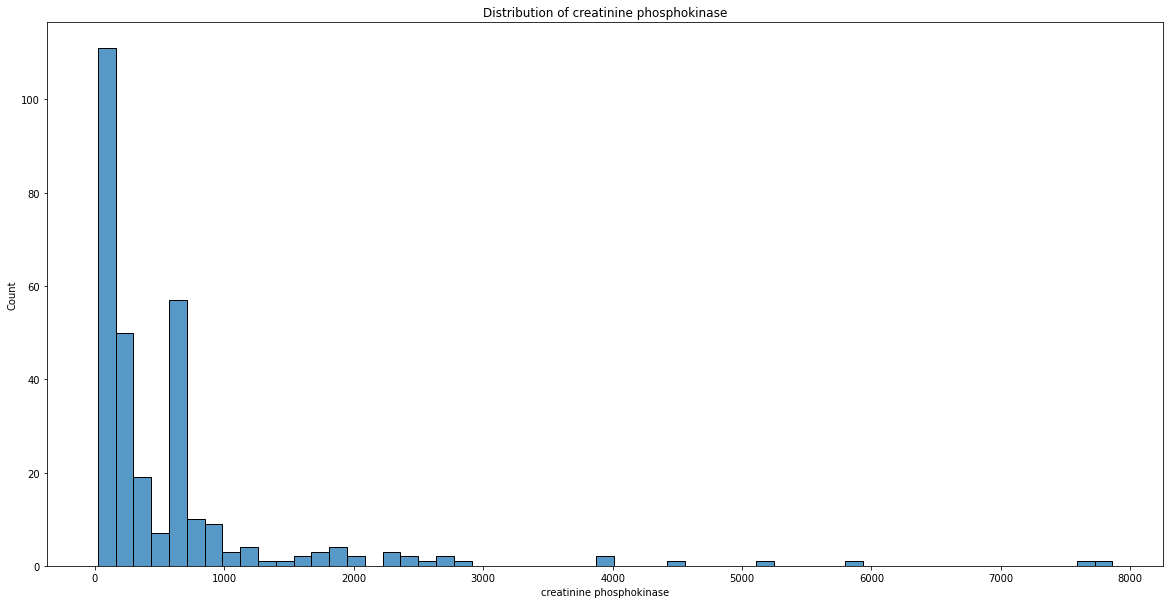

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(x=data.creatinine_phosphokinase, ax=ax)
plt.title('Distribution of creatinine phosphokinase')
plt.xlabel('creatinine phosphokinase')

plt.show()

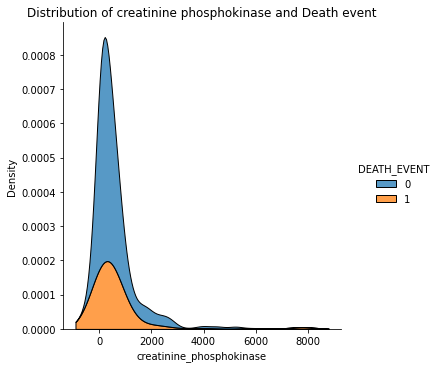

In [13]:
sns.displot(data=data, x="creatinine_phosphokinase", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of creatinine phosphokinase and Death event')
plt.xlabel('creatinine_phosphokinase')
plt.show()

##### Plateletes

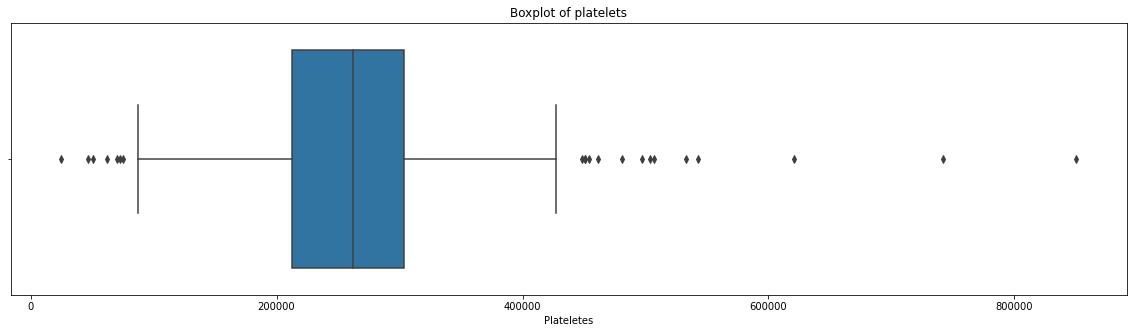

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.platelets, ax=ax)
plt.title('Boxplot of platelets')
plt.xlabel('Plateletes')
plt.show()

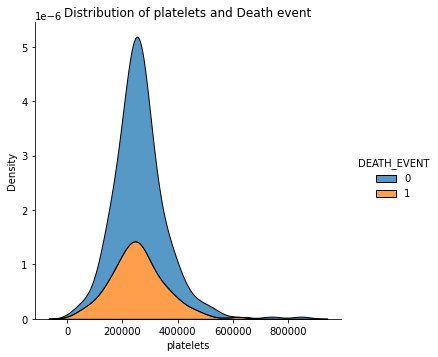

In [15]:
sns.displot(data=data, x="platelets", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of platelets and Death event')
plt.xlabel('platelets')
plt.show()

##### Serum creatinine

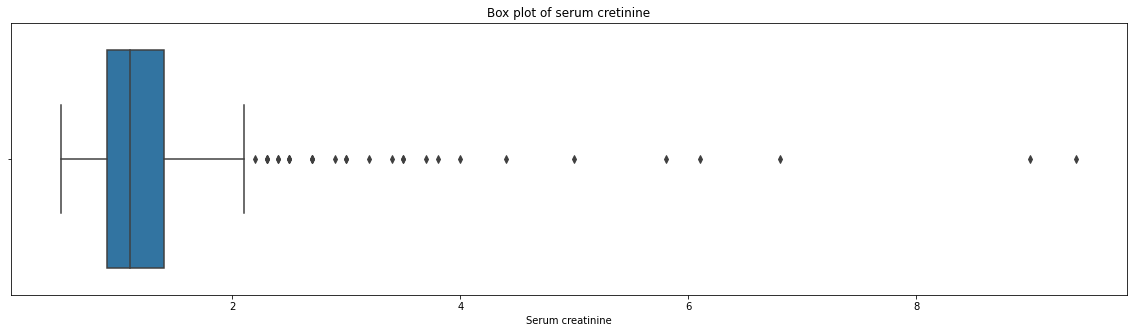

In [16]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.serum_creatinine, ax=ax)
plt.title('Box plot of serum cretinine')
plt.xlabel('Serum creatinine')
plt.show()

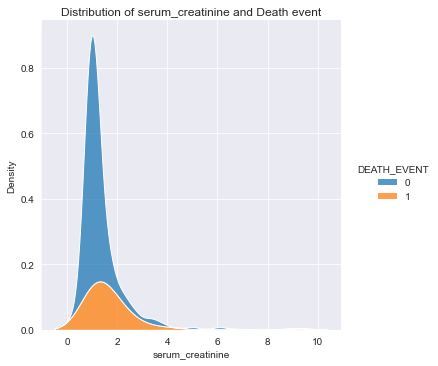

In [76]:
sns.displot(data=data, x="serum_creatinine", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of serum_creatinine and Death event')
plt.xlabel('serum_creatinine')
plt.show()

##### Seruim sodium

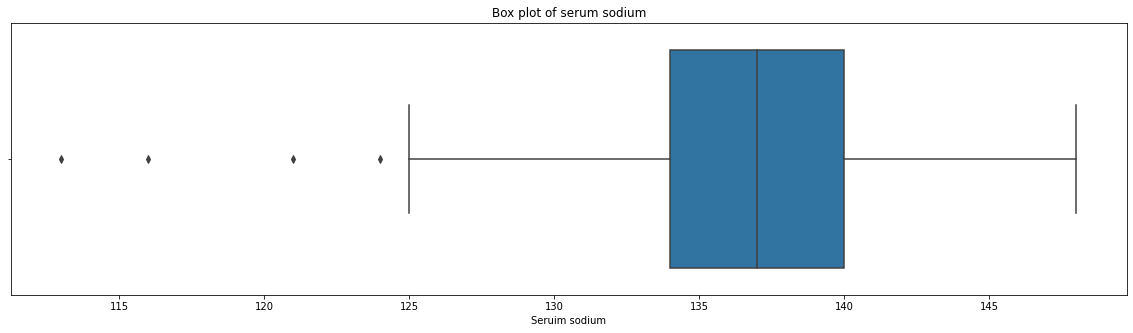

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.serum_sodium, ax=ax)
plt.title('Box plot of serum sodium')
plt.xlabel('Seruim sodium')
plt.show()

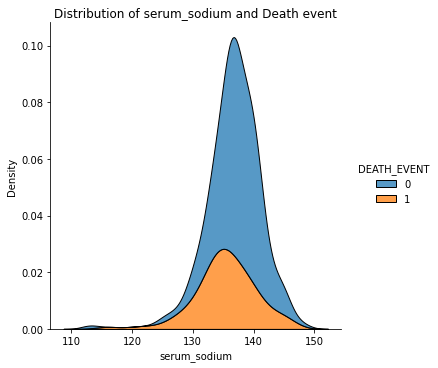

In [19]:
sns.displot(data=data, x="serum_sodium", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of serum_sodium and Death event')
plt.xlabel('serum_sodium')
plt.show()

##### Time

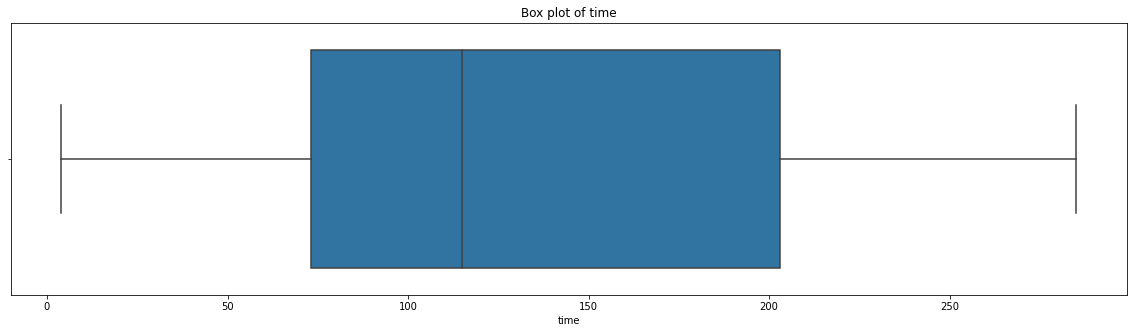

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.time, ax=ax)
plt.title('Box plot of time')
plt.show()

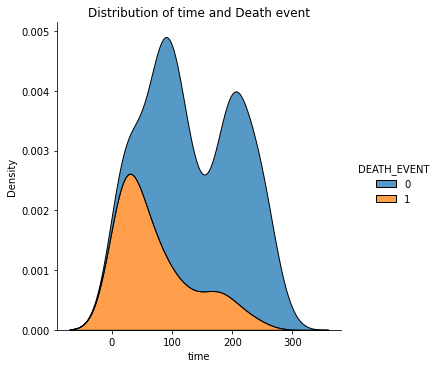

In [21]:
sns.displot(data=data, x="time", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of time and Death event')
plt.xlabel('time')
plt.show()

#### Categorical features

##### Anaemia

Text(0.5, 1.0, 'The number of people has and do not have anaemia')

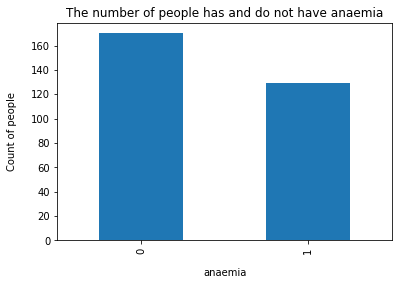

In [22]:
data['anaemia'].value_counts().plot(kind='bar')
plt.xlabel("anaemia", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('The number of people has and do not have anaemia')

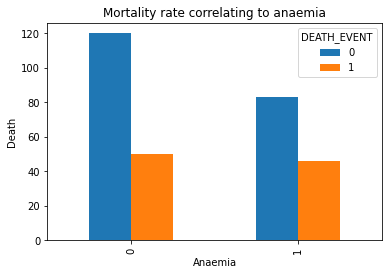

In [23]:
pd.crosstab(data.anaemia  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

##### Diabetes

Text(0.5, 1.0, 'The number of people has and do not have diabetes')

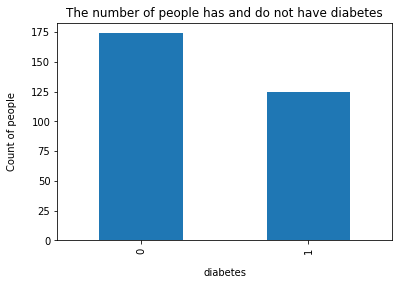

In [24]:
data['diabetes'].value_counts().plot(kind='bar')
plt.xlabel("diabetes", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('The number of people has and do not have diabetes')

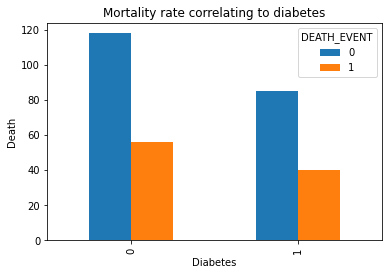

In [25]:
pd.crosstab(data.diabetes  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Death')
plt.show()

##### High blood pressure

Text(0.5, 1.0, 'The number of people with or without high_blood_pressure')

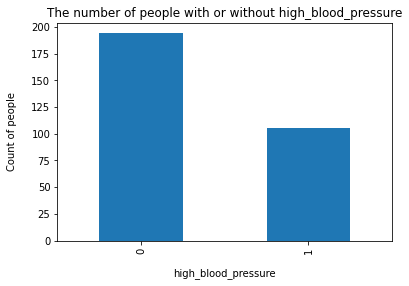

In [26]:
data['high_blood_pressure'].value_counts().plot(kind='bar')
plt.xlabel("high_blood_pressure", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('The number of people with or without high_blood_pressure')

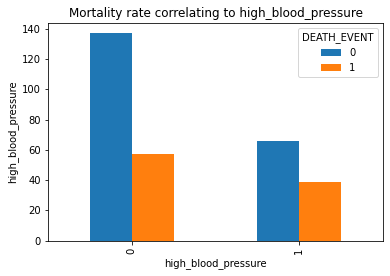

In [27]:
pd.crosstab(data.high_blood_pressure  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to high_blood_pressure')
plt.ylabel('high_blood_pressure')
plt.show()

##### Gender

Text(0.5, 1.0, 'Number of male and female')

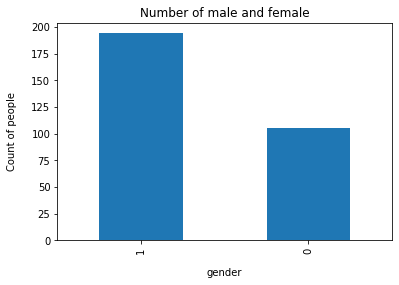

In [28]:
data['sex'].value_counts().plot(kind='bar')
plt.xlabel("gender", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('Number of male and female')

##### Smoking

Text(0.5, 1.0, 'Number of patient smoke')

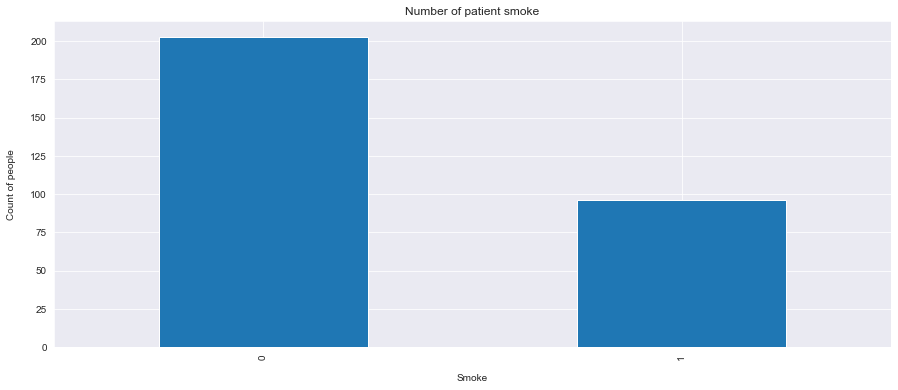

In [77]:
data['smoking'].value_counts().plot(kind='bar')
plt.xlabel("Smoke", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('Number of patient smoke')

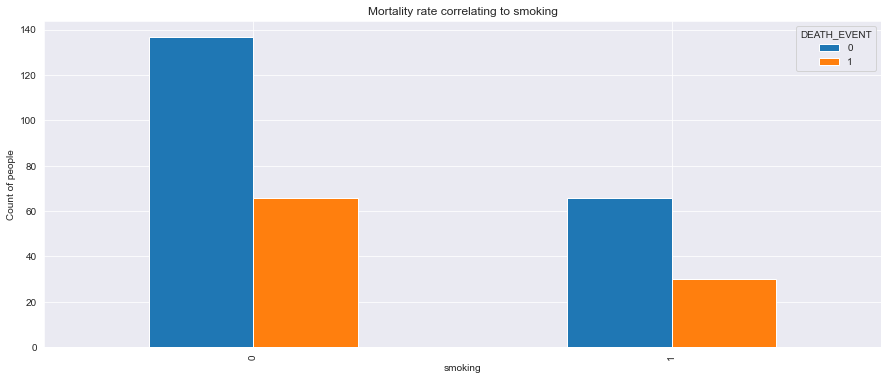

In [78]:
pd.crosstab(data.smoking  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to smoking')
plt.ylabel('Count of people')
plt.show()

##### Death event

Text(0.5, 1.0, 'Number of death patients')

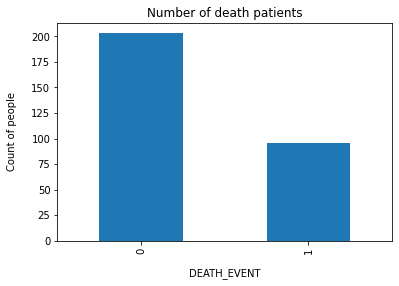

In [31]:
data['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.xlabel("DEATH_EVENT", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('Number of death patients')

In [32]:
data['DEATH_EVENT'].value_counts()


0    203
1     96
Name: DEATH_EVENT, dtype: int64

#### 2. The patients’ age and sex affect the their health’s indicators 



#### 3. Is health indices affect the mortality rate of patients?



## Predictive analysis

In [33]:
# Import ML library
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb 


### Data preprocessing 

* split the data
* oversampling data set


In [34]:
y = data['DEATH_EVENT']
X = data.drop(['DEATH_EVENT', 'time'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [35]:
# Over sampling train data to avoid imbalance data set
from imblearn.over_sampling import SMOTE

df = pd.concat([X_train, y_train], axis=1)

sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(df.drop('DEATH_EVENT', axis=1), df['DEATH_EVENT'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train['DEATH_EVENT'].value_counts()

0    168
1    168
Name: DEATH_EVENT, dtype: int64

In [36]:
X_train = oversampled_trainX.copy()
y_train = oversampled_trainY.copy()

### Evaluation Framework

In [37]:
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
     INPUT:
    y_train_true: True binary labels of 0 or 1 in the training dataset
    y_train_prob: Probability in range {0,1} predicted by the model for the training dataset
    y_test_true: True binary labels of 0 or 1 in the testing dataset
    y_test_prob: Probability in range {0,1} predicted by the model for the testing dataset
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print ('Train Accuracy: %s ' %acc_train)
    print ('Train AUC: %s ' %auc_train)
    print ('Train Confusion Matrix:')
    print (cm_train)

    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print ('Test Accuracy: %s ' %acc_test)
    print ('Test AUC: %s ' %auc_test)
    print ('Test Confusion Matrix:')
    print (cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.show()

    return best_threshold

In [38]:
def evaluate_model_performance(clf, X_train, y_train):
    '''evaluate a model's accuracy and F1-score
    INPUT:
    clf - Model object
    X_train - Training data matrix
    y_train - Expected model output vector
    OUTPUT:
    clf_accuracy: Model accuracy
    clf_f1_score: Model F1-score
    '''
    y_pred_rf = clf.predict(X_train)
    clf_accuracy = accuracy_score(y_train, y_pred_rf)
    clf_f1_score = f1_score(y_train, y_pred_rf)
    clf_recall_score = recall_score(y_train, y_pred_rf, average='binary')

    return clf_accuracy, clf_f1_score, clf_recall_score

In [39]:
model_score = []

### Data modelling

1. Gaussian Naive Bayes

In [40]:
%%time

nb_clf =  GaussianNB()

nb_clf.fit(X_train, y_train)  

print('Best Score: ', nb_clf.score(X_val, y_val))

acc, f1, recall = evaluate_model_performance(nb_clf, X_val, y_val)
model_score.append(['Gaussian Naive Bayes', acc, f1, recall])

Best Score:  0.7
CPU times: user 8.78 ms, sys: 1.74 ms, total: 10.5 ms
Wall time: 9.18 ms


Train Accuracy: 0.7440476190476191 
Train AUC: 0.7440476190476191 
Train Confusion Matrix:
[[122  46]
 [ 40 128]]
Test Accuracy: 0.7166666666666667 
Test AUC: 0.7000000000000002 
Test Confusion Matrix:
[[28  7]
 [10 15]]


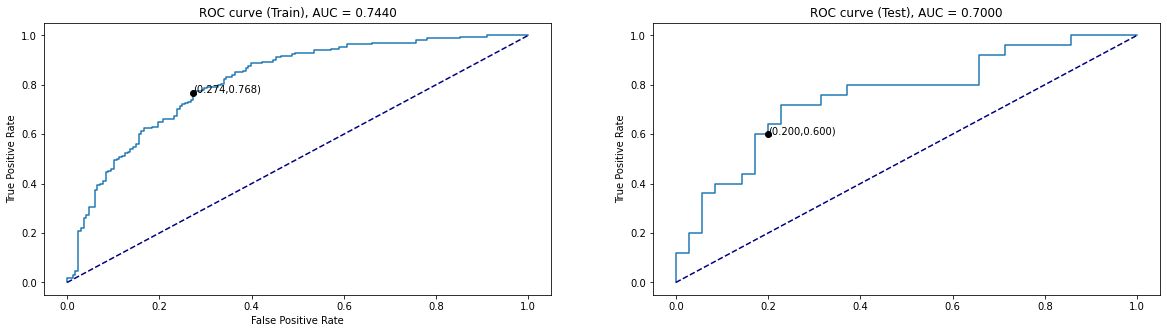

0.421713352120538

In [41]:
y_test_pred_proba = nb_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = nb_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

2. Logistic regression

In [62]:
%%time

model =  LogisticRegression()

parameters = {
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'C': [ 0.01, 0.1, 10, 100],
    'max_iter': [5000, 10000, 20000]
}

log_reg = GridSearchCV(model, parameters, refit=True, verbose=1, cv = 5, n_jobs = 4)
log_reg.fit(X_train, y_train)

print('Best Score: ', log_reg.best_score_*100, '\nBest Parameters: ', log_reg.best_params_)

acc, f1, recall = evaluate_model_performance(log_reg, X_val, y_val)
model_score.append(['Logistic regression', acc, f1, recall])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score:  73.4899034240562 
Best Parameters:  {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: user 76.3 ms, sys: 8.01 ms, total: 84.3 ms
Wall time: 422 ms


Train Accuracy: 0.7708333333333334 
Train AUC: 0.7708333333333334 
Train Confusion Matrix:
[[126  42]
 [ 35 133]]
Test Accuracy: 0.7166666666666667 
Test AUC: 0.7057142857142858 
Test Confusion Matrix:
[[27  8]
 [ 9 16]]


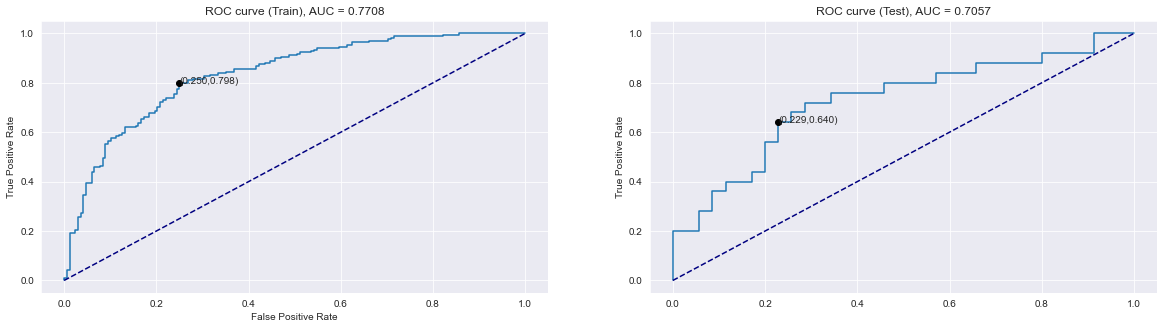

0.47016694879886

In [63]:
y_test_pred_proba = log_reg.predict_proba(X_val)[::,1]
y_train_pred_proba = log_reg.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

3. AdaboostClassifier

In [64]:

%%time

model = AdaBoostClassifier()

parameters = {
    'n_estimators': [200, 300, 500, 600, 800],
    'learning_rate':[0.001, 0.1, 0.2, 0.5]
}

ada_clf = GridSearchCV(model, parameters, refit=True, verbose=1, cv = 5, n_jobs = 4)
ada_clf.fit(X_train, y_train)

print('Best Score: ', ada_clf.best_score_*100, '\nBest Parameters: ', ada_clf.best_params_)

acc, f1, recall = evaluate_model_performance(ada_clf, X_val, y_val)
model_score.append(['Adaboost classifier', acc, f1, recall])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score:  78.87620719929764 
Best Parameters:  {'learning_rate': 0.2, 'n_estimators': 200}
CPU times: user 352 ms, sys: 19.3 ms, total: 371 ms
Wall time: 15.7 s


Train Accuracy: 0.8958333333333334 
Train AUC: 0.8958333333333333 
Train Confusion Matrix:
[[152  16]
 [ 19 149]]
Test Accuracy: 0.7 
Test AUC: 0.6742857142857143 
Test Confusion Matrix:
[[29  6]
 [12 13]]


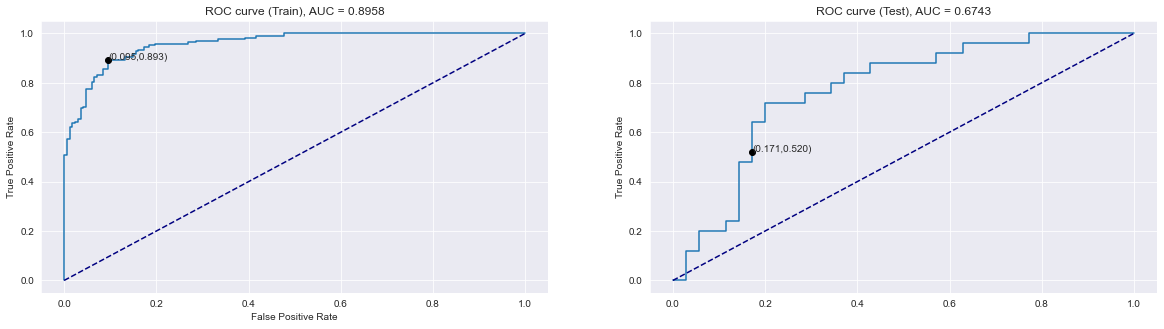

0.5007130285784849

In [65]:
y_test_pred_proba = ada_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = ada_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

4. Random forest

In [66]:
%%time
model =  RandomForestClassifier()

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

parameters = {'n_estimators': [100, 200, 300],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2] }

rf_clf= GridSearchCV(model, parameters, refit=True, verbose=1, cv = 5, n_jobs = 4)
rf_clf.fit(X_train, y_train)

print('Best Score: ', rf_clf.best_score_*100, '\nBest Parameters: ', rf_clf.best_params_)

acc, f1, recall = evaluate_model_performance(rf_clf, X_val, y_val)
model_score.append(['Random Forest', acc, f1, recall])

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Score:  84.5171202809482 
Best Parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
CPU times: user 1.31 s, sys: 97.9 ms, total: 1.4 s
Wall time: 1min 36s


Train Accuracy: 0.9970238095238095 
Train AUC: 0.9970238095238095 
Train Confusion Matrix:
[[168   0]
 [  1 167]]
Test Accuracy: 0.6833333333333333 
Test AUC: 0.6542857142857142 
Test Confusion Matrix:
[[29  6]
 [13 12]]


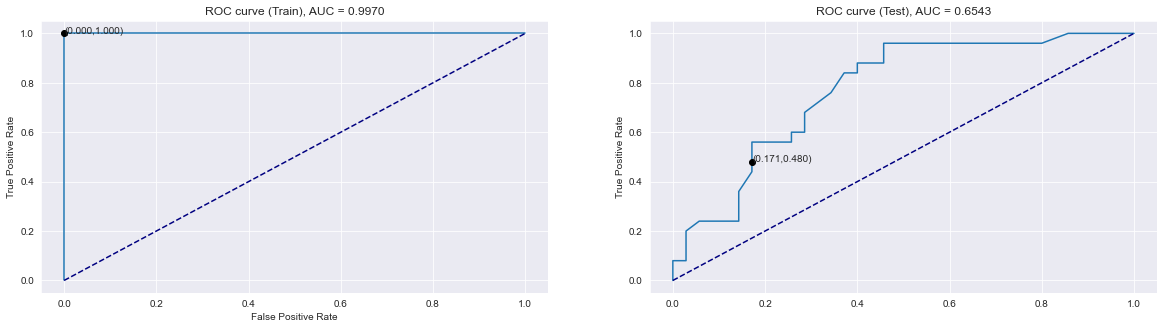

0.64

In [67]:
y_test_pred_proba = rf_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = rf_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

5. LightGBM

In [68]:
%%time

model = lgb.LGBMClassifier()
# Create parameters to search
gridParams = {
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [5, 10, 15, None],
    'min_data_in_leaf': [30, 50, 100],
    'boosting_type': ['gbdt', 'dart']
    }

# To view the default model params:
model.get_params().keys()

# Create the grid
lgb_clf = GridSearchCV(model, gridParams,
                    verbose=1,
                    cv = 5,
                    n_jobs = 4)
# Run the grid
lgb_clf.fit(X_train, y_train)

# Print the best parameters found
print(lgb_clf.best_params_)
print(lgb_clf.best_score_)

acc, f1, recall = evaluate_model_performance(lgb_clf, X_val, y_val)
model_score.append(['LightGBM', acc, f1, recall])

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 10, 'min_data_in_leaf': 30}
0.8036435469710274
CPU times: user 442 ms, sys: 24.2 ms, total: 466 ms
Wall time: 1.88 s


Train Accuracy: 0.9732142857142857 
Train AUC: 0.9732142857142858 
Train Confusion Matrix:
[[162   6]
 [  3 165]]
Test Accuracy: 0.7666666666666667 
Test AUC: 0.7485714285714287 
Test Confusion Matrix:
[[30  5]
 [ 9 16]]


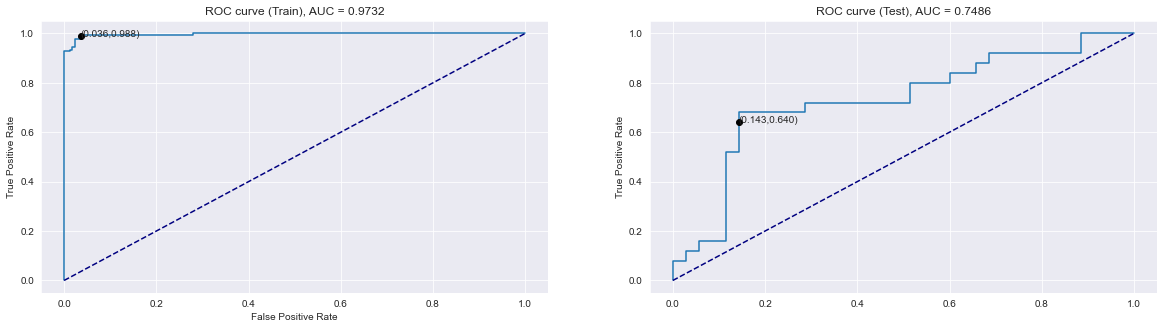

0.45635413678648

In [69]:
y_test_pred_proba = lgb_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = lgb_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

### Model Evaluation

In [70]:
# Display the score of model with test data set
scores = pd.DataFrame(model_score, columns =['Model', 'Accuracy Score', 'F1 Score', 'Recall score'])
scores

,Model,Accuracy Score,F1 Score,Recall score
0,Gaussian Naive Bayes,0.700000,0.590909,0.52
1,Logistic regression,0.650000,0.553191,0.52
2,Adaboost classifier,0.650000,0.487805,0.40
3,Random Forest,0.666667,0.545455,0.48
4,LightGBM,0.700000,0.590909,0.52
5,Logistic regression,0.700000,0.608696,0.56
6,Adaboost classifier,0.733333,0.652174,0.60
7,Random Forest,0.716667,0.622222,0.56
8,LightGBM,0.750000,0.666667,0.60


<AxesSubplot:xlabel='Model', ylabel='Accuracy Score'>

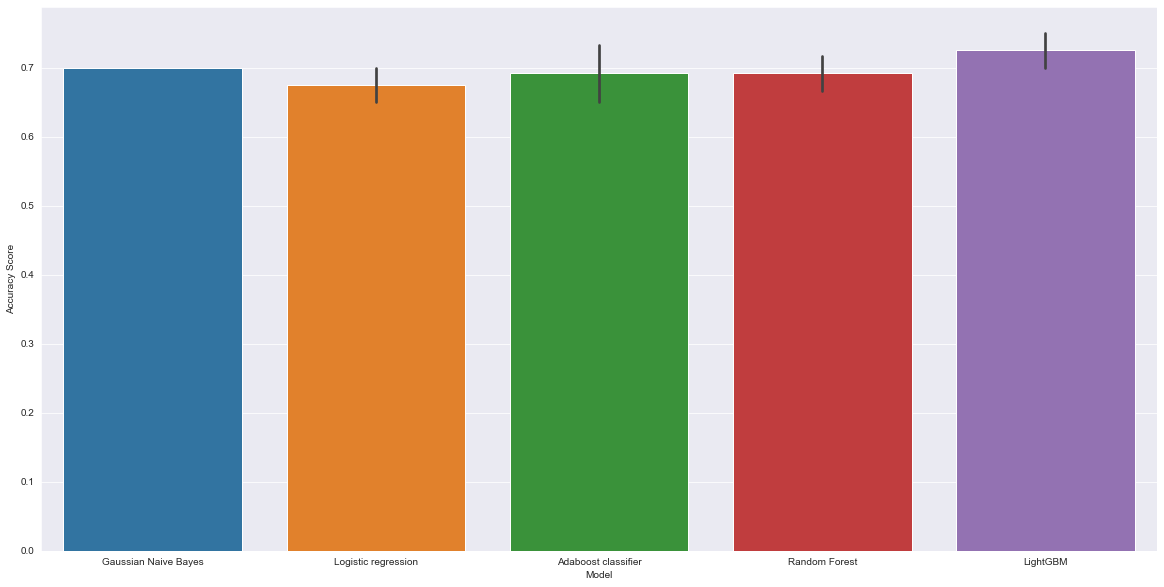

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=scores, x='Model', y='Accuracy Score',  ax=ax)

<AxesSubplot:xlabel='Model', ylabel='F1 Score'>

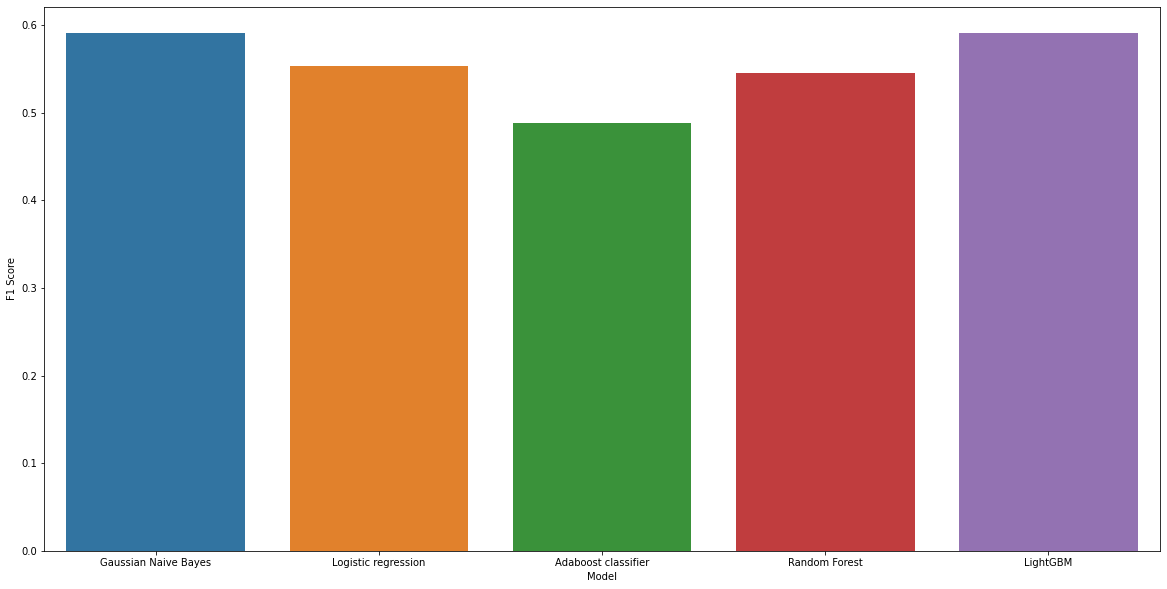

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=scores, x='Model', y='F1 Score',  ax=ax)

### Feature Ranking

high_blood_pressure           3
anaemia                       9
diabetes                      9
smoking                      13
sex                          53
serum_sodium                 66
creatinine_phosphokinase     79
platelets                    87
ejection_fraction           112
age                         122
serum_creatinine            182
dtype: int32


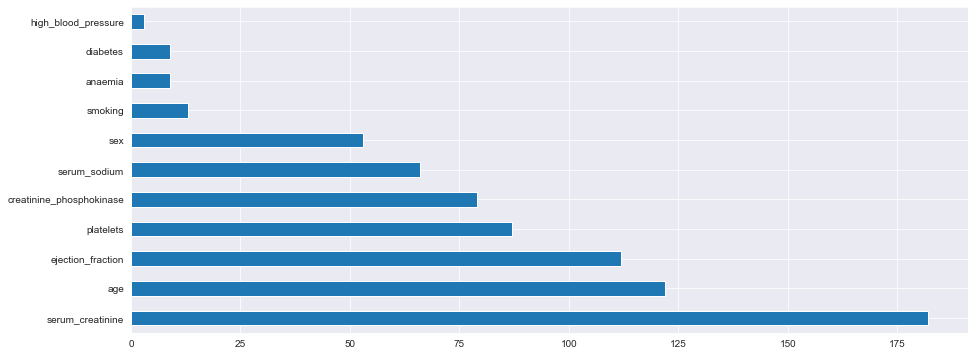

In [53]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

feat_importances = pd.Series(lgb_clf.best_estimator_.feature_importances_, index=X_train.columns)
print(feat_importances.sort_values(ascending=True))
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

high_blood_pressure         0.017023
anaemia                     0.017557
diabetes                    0.020777
smoking                     0.024265
sex                         0.030975
platelets                   0.104488
serum_sodium                0.111119
creatinine_phosphokinase    0.111360
ejection_fraction           0.158137
age                         0.160264
serum_creatinine            0.244033
dtype: float64


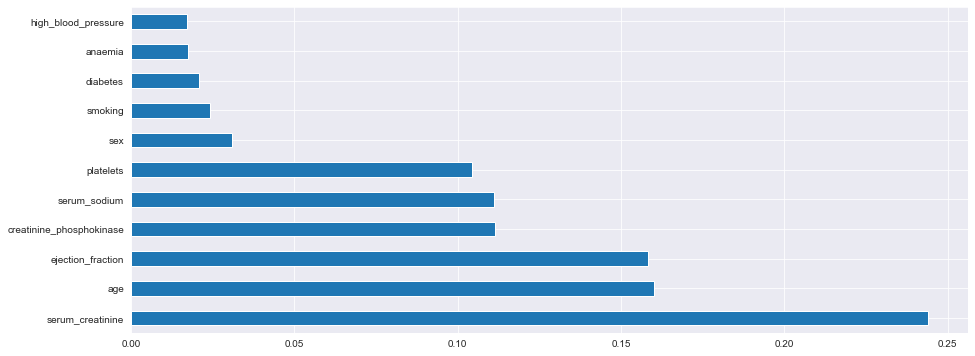

In [54]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

feat_importances = pd.Series(rf_clf.best_estimator_.feature_importances_, index=X_train.columns)
print(feat_importances.sort_values(ascending=True))

feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [55]:
y = data['DEATH_EVENT']
X_train = X_train.drop(['anaemia', 'high_blood_pressure', 'diabetes', 'smoking', 'sex'], axis=1)
X_val = X_val.drop(['anaemia', 'high_blood_pressure', 'diabetes', 'smoking', 'sex'], axis=1)



In [72]:
%%time

model = lgb.LGBMClassifier()
# Create parameters to search
gridParams = {
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [5, 10, 15, None],
    'min_data_in_leaf': [30, 50, 100],
    'boosting_type': ['gbdt', 'dart']
    }

# To view the default model params:
model.get_params().keys()

# Create the grid
lgb_clf = GridSearchCV(model, gridParams,
                    verbose=1,
                    cv = 5,
                    n_jobs = 4)
# Run the grid
lgb_clf.fit(X_train, y_train)

# Print the best parameters found
print(lgb_clf.best_params_)
print(lgb_clf.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 10, 'min_data_in_leaf': 30}
0.8036435469710274
CPU times: user 514 ms, sys: 75.3 ms, total: 589 ms
Wall time: 3.53 s


Train Accuracy: 0.9732142857142857 
Train AUC: 0.9732142857142858 
Train Confusion Matrix:
[[162   6]
 [  3 165]]
Test Accuracy: 0.7666666666666667 
Test AUC: 0.7485714285714287 
Test Confusion Matrix:
[[30  5]
 [ 9 16]]


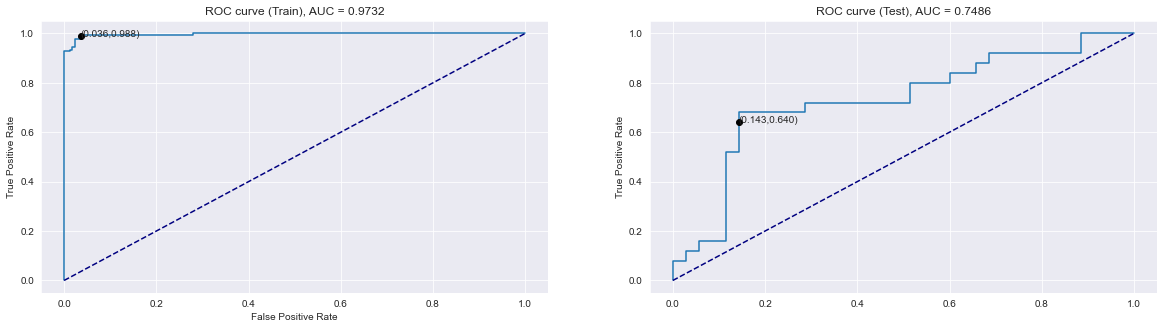

0.45635413678648

In [73]:
y_test_pred_proba = lgb_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = lgb_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

In [74]:
acc, f1, recall = evaluate_model_performance(lgb_clf, X_val, y_val)

print(acc)
print(f1)

0.75
0.6666666666666665
